In [1]:
import re
import numpy as np
import pandas as pd
import missingno as mno

In [2]:
df = pd.read_csv('geocoded.csv')
df.head()

,price,title,longitude,latitude,floor,furnishing,tenants preferred,bathroom,facing,availability,car parking,balcony,owner resides,overlooking,address,gmaps_info,coord
0,"₹ 19,000",3 BHK Apartment for rent in Vijay Shanthi Apar...,12.760201,80.207000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Vijay Shanthi Apartment, Kelambakkam, Old Mah...",[{'address_components': [{'long_name': 'Chenna...,"(12.7606528, 80.2079447)"
1,"₹ 8,500",1 BHK House for rent in Tambaram Sanatorium,13.044208,80.200531,Ground out of 1 Floor,Unfurnished,Bachelors,1.0,South,Immediately,1 Open,NaN,NaN,NaN,"Tambaram Sanatorium, Hyderabad",[{'address_components': [{'long_name': 'Tambar...,"(17.385044, 78.486671)"
2,"₹ 35,000",3 BHK Builder Floor for rent in Pushpa Nagar-N...,78.486671,17.385044,2 out of 2 Floors,Semi-Furnished,Family,3.0,East,Immediately,5 Covered,1.0,Same Premise,NaN,"Pushpa Nagar-Nungambakkam, Hyderabad",[{'address_components': [{'long_name': 'Pushpa...,"(17.385044, 78.486671)"
3,"₹ 15,000",2 BHK House for rent in Velachery 950 sqft,12.979078,80.219185,1 out of 2 Floors,Unfurnished,Bachelors/Family,2.0,NaN,Immediately,NaN,1.0,NaN,NaN,"Velachery, Hyderabad",[{'address_components': [{'long_name': 'Madipa...,"(12.9771281, 80.22274589999999)"
4,"₹ 15,000",2 BHK Apartment for rent in Arun Excello Sanka...,80.162565,12.817676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arun Excello Sankara, Mambakkam, Hyderabad",[{'address_components': [{'long_name': 'Kelamb...,"(12.8176758, 80.16256489999999)"


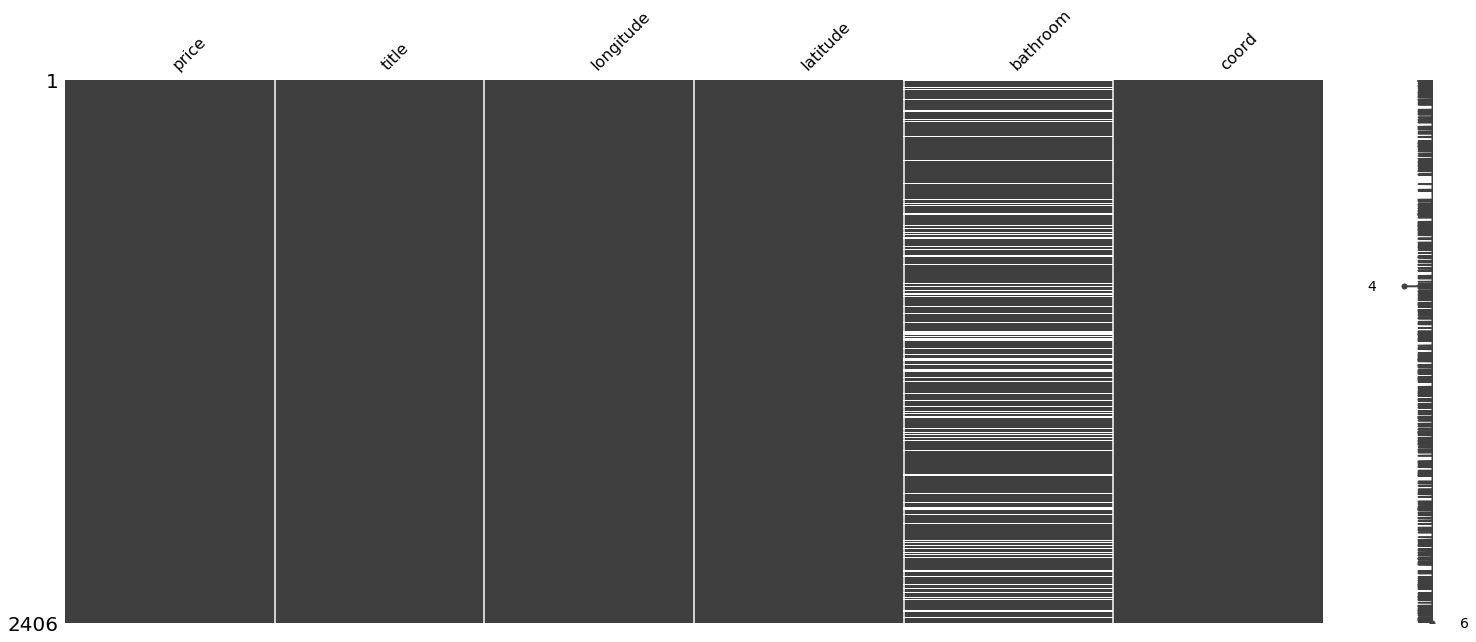

In [3]:
df.drop(columns=['tenants preferred', 'availability', 'balcony', 'furnishing',
                 'floor', 'facing', 'overlooking', 'car parking', 'owner resides',
                 'address', 'gmaps_info'], inplace=True)
mno.matrix(df);

In [4]:
def parse_price(x):
    if ',' in x: return int(re.sub(",", "", x[2:]))
    else: return np.nan
df['price'] = df['price'].apply(parse_price)

In [5]:
def parse_baths(x):
    try: return int(re.findall(r'\d+', x)[0])
    except: return np.nan
df['bathroom'] = df['bathroom'].apply(parse_baths)

In [6]:
def parse_bhk(x):
    try: return int(x.split()[0])
    except: return np.nan
df['bhk'] = df['title'].apply(parse_bhk)

In [7]:
def parse_sqft(x):
    try: return int(x.split()[-2])
    except: return np.nan
df['sqft'] = df['title'].apply(parse_sqft)

In [8]:
df.drop(columns='title', inplace=True)
df.head()

,price,longitude,latitude,bathroom,coord,bhk,sqft
0,19000.0,12.760201,80.207000,NaN,"(12.7606528, 80.2079447)",3.0,1150.0
1,8500.0,13.044208,80.200531,NaN,"(17.385044, 78.486671)",1.0,NaN
2,35000.0,78.486671,17.385044,NaN,"(17.385044, 78.486671)",3.0,1600.0
3,15000.0,12.979078,80.219185,NaN,"(12.9771281, 80.22274589999999)",2.0,950.0
4,15000.0,80.162565,12.817676,NaN,"(12.8176758, 80.16256489999999)",2.0,970.0


In [9]:
df.to_csv('cleaned.csv', index=False)